In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_file = pd.read_csv("data.txt", header = None)
tensor_data = torch.tensor(data_file.values, dtype = torch.float64)
x = tensor_data[:,[0,1]]
y = tensor_data[:,2]

In [3]:
def perceptron(x):
    if x > 0:
        return 1
    else:
        return -1

In [4]:
w = torch.zeros(size = (x.shape[1], 1), dtype = torch.float64)
b = torch.zeros(size = (1, 1), dtype = torch.float64)

In [5]:
while True:
    flag = False
    for i in range(x.shape[0]):
        if y[i] * (torch.matmul(x[i], w) + b) <= 0:
            w = w + y[i] * x[i].reshape(w.shape)
            b = b + y[i]
            flag = True
    if not flag:
        break

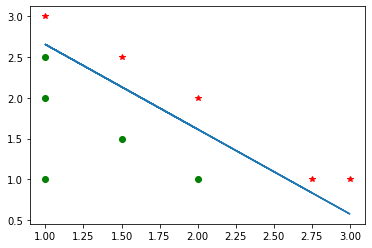

In [6]:
x0 = x[:,0]
x1 = torch.empty(x0.size(0))
for i in range(0, x0.size(0)):
    x1[i] = (-b - w[0] * x0[i]) / w[1]
for i in range(0, tensor_data.size(0)):
    if tensor_data[i, 2] == -1:
        plt.plot(tensor_data[i,0], tensor_data[i,1], 'o', color = 'green')
    else:
        plt.plot(tensor_data[i,0], tensor_data[i,1], '*', color = 'red')
plt.plot(x0, x1)